# Jonathan Halverson
# Monday, March 20, 2017
# Part 9: Education

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])

iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters_fm = pd.read_csv(iofile, header=0, parse_dates=['Dob'])

iofile = 'data/ufc_dot_com_fighter_data_CLEAN_28Feb2017.csv'
fighters_ufc = pd.read_csv(iofile, header=0)

### How many past and present UFC fighters are college graduates or degree holders?

In [3]:
fighters_ufc[['College', 'Degree']].dropna(thresh=1).shape[0]

186

In [4]:
fighters_ufc[fighters_ufc.Active == 1][['College', 'Degree']].dropna(thresh=1).shape[0]

55

In [5]:
fighters_ufc[fighters_ufc.Active == 0][['College', 'Degree']].dropna(thresh=1).shape[0]

131

### Conform names between FM and UFC

In [6]:
win_lose = fights.Winner.append(fights.Loser, ignore_index=True)
win_lose = set(win_lose)

In [7]:
set(win_lose) - set(fighters_ufc.Name)

{'Alberta Cerra Leon',
 'Alex Stiebling',
 'Amaury Bitetti',
 'An Ying Wang',
 'Antonio Dos Santos',
 'Benji Radach',
 'CJ Keith',
 'Carlos Barreto',
 'Cesar Marscucci',
 'Chris Liguori',
 'Chris de la Rocha',
 'Christophe Leninger',
 'Dan Bobish',
 'Danillo Villefort',
 'Danny Downes',
 'David Abbott',
 'David Kaplan',
 'Dmitri Stepanov',
 'Dwayne Cason',
 'Ebenezer Fontes Braga',
 'Eddie Mendez',
 'Edilberto de Oliveira',
 'Edwin DeWees',
 'Eldo Xavier Dias',
 'Emmanuel Yarborough',
 'Flavio Luiz Moura',
 'Geza Kalman',
 'JC Cottrell',
 'Jacare Souza',
 'Jack Nilson',
 'Jimmy Wallhead',
 'Joao Pierini',
 'Joe Moreira',
 'Jon Olav Einemo',
 'Josh Rafferty',
 'Josh Shockman',
 'Josh Stansbury',
 'Josh Stewart',
 'Joshua Sampo',
 'Julian Sanchez',
 'Katsuhisa Fujii',
 'Keiichiro Yamamiya',
 'Kevin Ferguson',
 'Kit Cope',
 'Kristof Midoux',
 'Luiz Cane',
 'Manvel Gamburyan',
 'Marcelo Aguiar',
 'Marcelo Mello',
 'Marcio Alexandre Junior',
 'Marcos Rogerio de Lima',
 'Marcus Silveira',
 '

In [8]:
from fuzzywuzzy import process

# fighters in the FightMetric database not found in the UFC database
not_found = set(win_lose) - set(fighters_ufc.Name)

# these names have no match
wrong_match = ['Nate Loughran', 'Julian Sanchez', 'Kit Cope', 'Edilberto de Oliveira' ,
               'Kevin Ferguson', 'Eddie Mendez', 'Danillo Villefort', 'Masutatsu Yano',
               'Joao Pierini', 'Saeed Hosseini', 'Luiz Cane', 'Scott Smith', 'Tito Ortiz',
               'Benji Radach', 'Tim Johnson', 'David Abbott', 'Rafael Feijao',
               'William Patolino', 'Jacare Souza', 'Kevin Ferguson']

for fighter in not_found:
     if (fighter not in wrong_match):
          best_match, score = process.extractOne(query=fighter, choices=fighters_ufc.Name)
          print fighter, '<--', best_match
          idx = fighters_ufc[fighters_ufc.Name == best_match].index
          fighters_ufc = fighters_ufc.set_value(idx, 'Name', fighter)

Joe Moreira <-- Joe Moriera
Philip De Fries <-- Phil De Fries
Sean Daugherty <-- Sean Daughtery
Steve Kennedy <-- Steven Kennedy
Tony Fryklund <-- Tony Frycklund
Emmanuel Yarborough <-- Emmanuel Yarbrough
Amaury Bitetti <-- Amaury Bitteti
Marcio Alexandre Junior <-- Marcio Alexandre
Antonio Dos Santos <-- Antonio dos Santos
Katsuhisa Fujii <-- Katsuhisa Fuji
Richard Walsh <-- Rich Walsh
Dwayne Cason <-- Duane Cason
Christophe Leninger <-- Christophe Leininger
Geza Kalman <-- Geza Kahlman Jr
Alex Stiebling <-- Alex Steibling
Edwin DeWees <-- Edwin Dewees
Miguel Torres <-- Miguel Angel Torres
Tsuyoshi Kohsaka <-- Tsuyoshi Kosaka
JC Cottrell <-- J.C. Cottrell
Sai Wang <-- Wang Sai
Jon Olav Einemo <-- John-Olav Einemo
Carlos Barreto <-- Carlos Baretto
Reza Nasri <-- Reza Nazri
Alberta Cerra Leon <-- Alberto Cerro Leon
Tony Petarra <-- Tony Peterra
Keiichiro Yamamiya <-- Keichiro Yamamiya
Rameau Thierry Sokoudjou <-- Rameau Sokoudjou
Marcelo Aguiar <-- Marcello Aguiar
Danny Downes <-- Dan D

In [9]:
# not the first choice so do manually
idx = fighters_ufc[(fighters_ufc.Name == 'Timothy Johnson')].index
fighters_ufc = fighters_ufc.set_value(idx, 'Name', 'Tim Johnson')
idx = fighters_ufc[(fighters_ufc.Name == 'Tank Abbott') & (fighters_ufc.Nickname == 'Tank')].index
fighters_ufc = fighters_ufc.set_value(idx, 'Name', 'David Abbott')
idx = fighters_ufc[(fighters_ufc.Name == 'Rafael Cavalcante') & (fighters_ufc.Nickname == 'Feijao')].index
fighters_ufc = fighters_ufc.set_value(idx, 'Name', 'Rafael Feijao')
idx = fighters_ufc[(fighters_ufc.Name == 'William Macario') & (fighters_ufc.Nickname == 'Patolino')].index
fighters_ufc = fighters_ufc.set_value(idx, 'Name', 'William Patolino')
idx = fighters_ufc[(fighters_ufc.Name == 'Ronaldo Souza') & (fighters_ufc.Nickname == 'Jacare')].index
fighters_ufc = fighters_ufc.set_value(idx, 'Name', 'Jacare Souza')
idx = fighters_ufc[(fighters_ufc.Name == 'Kimbo Slice')].index
fighters_ufc = fighters_ufc.set_value(idx, 'Name', 'Kevin Ferguson')

These are the only fighters that fought in the UFC that are not in the UFC database:

In [10]:
no_ed_data = set(win_lose) - set(fighters_ufc.Name)
no_ed_data

{'Benji Radach',
 'Danillo Villefort',
 'Eddie Mendez',
 'Edilberto de Oliveira',
 'Joao Pierini',
 'Julian Sanchez',
 'Kit Cope',
 'Luiz Cane',
 'Masutatsu Yano',
 'Nate Loughran',
 'Saeed Hosseini',
 'Scott Smith',
 'Tito Ortiz'}

### Now join data sets

In [11]:
fighters_fm = fighters_fm.merge(fighters_ufc, on='Name', how='left', suffixes=('_FM', '_UFC'))
fighters_fm.head(3).T

,0,1,2
Name,Tom Aaron,Danny Abbadi,David Abbott
Nickname_FM,NaN,The Assassin,Tank
Dob,1978-07-13 00:00:00,1983-07-03 00:00:00,NaT
Weight_FM,155,155,265
Height_FM,NaN,71,72
Reach_FM,NaN,NaN,NaN
LegReach_FM,NaN,NaN,NaN
Stance,NaN,Orthodox,Switch
Win,5,4,10
Loss,3,6,14


Create sample table of UFC fighters with college:

In [12]:
ed_table = fighters_fm[['Name', 'College', 'Degree']].dropna(thresh=2).reset_index(drop=True).fillna('')
ed_table.index = range(1, ed_table.shape[0] + 1)
ed_table.to_latex('report/education/education_sample_RAW.tex')
ed_table

,Name,College,Degree
1,Jim Alers,University of Central Florida,Elementary Education
2,Corey Anderson,University of Wisconsin-Whitewater,Business Administration
3,Rich Attonito,Hofstra University,Communications
4,Ryan Bader,Arizona State University,Justice & Social Inquiry
5,Siyar Bahadurzada,Arnhem University,International Business and Languages
6,Tae Hyun Bang,Kyungbuk Science University,Political Studies
7,Phil Baroni,Central Michigan University,
8,Pat Barry,Louisiana State University,
9,Johnny Bedford,Cleveland State University,
10,Dennis Bermudez,Bloomsburg University,Anthropology


In [13]:
df = fights.merge(fighters_fm, how='left', left_on='Winner', right_on='Name')
df = df.merge(fighters_fm, how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df = df[['Winner', 'Outcome', 'Loser', 'Active', 'College', 'Degree', 'Active_L', 'College_L', 'Degree_L', 'Date']]
df.head(3)

,Winner,Outcome,Loser,Active,College,Degree,Active_L,College_L,Degree_L,Date
0,Germaine de Randamie,def.,Holly Holm,1.0,NaN,NaN,1.0,NaN,NaN,2017-02-11
1,Anderson Silva,def.,Derek Brunson,1.0,NaN,NaN,1.0,NaN,Criminal Justice,2017-02-11
2,Jacare Souza,def.,Tim Boetsch,1.0,NaN,NaN,1.0,Lock Haven University,Criminal Justice,2017-02-11


### Remove fights where no education data available (for the 13 fighters)

In [14]:
df = df[~((df.Winner.isin(no_ed_data)) | (df.Loser.isin(no_ed_data)))]

### Determine when the UFC started gathering educational data

In [15]:
started = df[['College', 'Degree', 'College_L', 'Degree_L', 'Date']]
at_least_one_fighter_college = started.dropna(thresh=2).Date.dt.year.value_counts().sort_index()
at_least_one_fighter_college

1997      4
1998      3
1999      2
2000      3
2001      7
2002      8
2003      9
2004     10
2005     23
2006     32
2007     40
2008     51
2009     78
2010    104
2011    132
2012    134
2013    146
2014    200
2015    142
2016    116
2017      9
Name: Date, dtype: int64

In [16]:
total_fights_per_year = fights.Date.dt.year.value_counts().sort_index()
total_fights_per_year

1993      8
1994     31
1995     40
1996     43
1997     41
1998     25
1999     44
2000     43
2001     40
2002     53
2003     41
2004     39
2005     80
2006    158
2007    171
2008    201
2009    215
2010    253
2011    300
2012    341
2013    386
2014    503
2015    473
2016    493
2017     46
Name: Date, dtype: int64

In [17]:
education_ratio = at_least_one_fighter_college.loc[1997:2016] / total_fights_per_year.loc[1997:2016]
education_ratio

1997    0.097561
1998    0.120000
1999    0.045455
2000    0.069767
2001    0.175000
2002    0.150943
2003    0.219512
2004    0.256410
2005    0.287500
2006    0.202532
2007    0.233918
2008    0.253731
2009    0.362791
2010    0.411067
2011    0.440000
2012    0.392962
2013    0.378238
2014    0.397614
2015    0.300211
2016    0.235294
Name: Date, dtype: float64

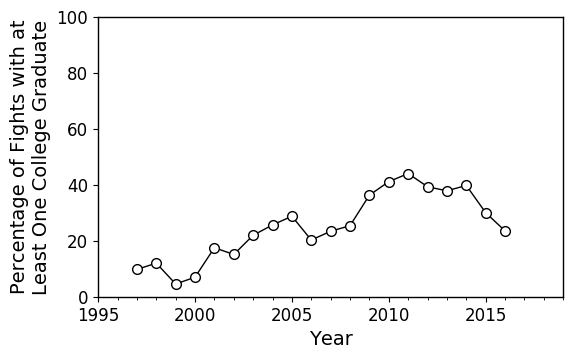

In [18]:
fig, ax = plt.subplots()
plt.plot(education_ratio.index, 100 * education_ratio.values, 'k-', marker='o', mfc='w')
plt.xlabel('Year')
plt.ylabel('Percentage of Fights with at\nLeast One College Graduate')
plt.ylim(0, 100)
minor_ticks = np.arange(1995, 2020, 1)
ax.set_xticks(minor_ticks, minor = True)
plt.savefig('report/education/fights_with_college_grad.pdf', bbox_inches='tight')

### Find fights since 2003 with one college graduate

In [19]:
df = df[df.Date > pd.to_datetime('2003-01-01')]

In [20]:
msk_W = (pd.notnull(df.College) | pd.notnull(df.Degree)) & (pd.isnull(df.College_L) & pd.isnull(df.Degree_L))
msk_L = (pd.isnull(df.College) & pd.isnull(df.Degree)) & (pd.notnull(df.College_L) | pd.notnull(df.Degree_L))

education = df[(msk_W | msk_L) & df.Outcome.isin(['def.', 'draw'])]
education

,Winner,Outcome,Loser,Active,College,Degree,Active_L,College_L,Degree_L,Date
1,Anderson Silva,def.,Derek Brunson,1.0,NaN,NaN,1.0,NaN,Criminal Justice,2017-02-11
2,Jacare Souza,def.,Tim Boetsch,1.0,NaN,NaN,1.0,Lock Haven University,Criminal Justice,2017-02-11
7,Islam Makhachev,def.,Nik Lentz,1.0,NaN,NaN,1.0,University of Minnesota,NaN,2017-02-11
9,Ryan LaFlare,def.,Roan Carneiro,1.0,Farmingdale State College,Business Management,1.0,NaN,NaN,2017-02-11
10,Chan Sung Jung,def.,Dennis Bermudez,1.0,NaN,NaN,1.0,Bloomsburg University,Anthropology,2017-02-04
12,James Vick,def.,Abel Trujillo,1.0,NaN,NaN,1.0,William Penn University,Sports Administration,2017-02-04
13,Volkan Oezdemir,def.,Ovince Saint Preux,1.0,NaN,NaN,1.0,University of Tennessee,Sociology,2017-02-04
37,Sergio Pettis,def.,John Moraga,1.0,NaN,NaN,1.0,Arizona State University,NaN,2017-01-15
42,Nina Ansaroff,def.,Jocelyn Jones-Lybarger,1.0,NaN,NaN,1.0,San Diego Mesa,NaN,2017-01-15
48,TJ Dillashaw,def.,John Lineker,1.0,Cal State Fullerton,Kinesiology,1.0,NaN,NaN,2016-12-30


In [21]:
education[education.Outcome == 'draw']

,Winner,Outcome,Loser,Active,College,Degree,Active_L,College_L,Degree_L,Date
144,Tyron Woodley,draw,Stephen Thompson,1.0,University of Missouri,Business,1.0,NaN,NaN,2016-11-12
512,Damon Jackson,draw,Levan Makashvili,0.0,Missouri Valley College,Exercise Science,0.0,NaN,NaN,2016-01-30
2497,BJ Penn,draw,Jon Fitch,1.0,NaN,NaN,0.0,Purdue University,Physical Education/History,2011-02-26
2780,Thiago Tavares,draw,Nik Lentz,0.0,NaN,NaN,1.0,University of Minnesota,NaN,2010-01-11


### Remove the four draws from the calculation

In [22]:
education = education[education.Outcome == 'def.']

In [23]:
num_winners = education[(pd.notnull(education.College) | pd.notnull(education.Degree)) & (education.Outcome == 'def.')].shape[0]
num_losers = education[(pd.notnull(education.College_L) | pd.notnull(education.Degree_L)) & (education.Outcome == 'def.')].shape[0]
total = education.shape[0]
num_winners, num_losers, total

(597, 462, 1059)

In [24]:
w_pct = 100 * num_winners / float(total)
w_pct

56.373937677053824

In [25]:
l_pct = 100 * num_losers / float(total)
l_pct

43.626062322946176

In [26]:
from scipy.stats import binom

2 * binom.cdf(p=0.5, k=min(num_winners, num_losers), n=total)

3.7409930432840298e-05

We reject the null hypothesis of independence and accept that alternative that fights with college education are more likely to win.

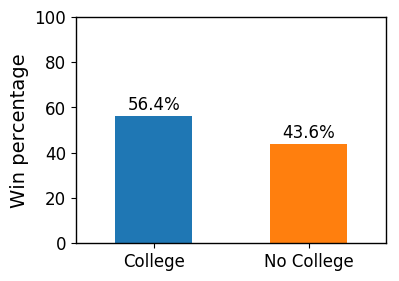

In [29]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.bar([0], [w_pct], width=0.5, align='center')
plt.bar([1], [l_pct], width=0.5, align='center')
plt.xlim(-0.5, 1.5)
plt.ylim(0, 100)
plt.xticks([0, 1])
ax.set_xticks([0, 1])
ax.set_xticklabels(['College', 'No College'])
plt.ylabel('Win percentage')
w_pct_str = '%.1f' % w_pct
l_pct_str = '%.1f' % l_pct
plt.text(1, 46.5, l_pct_str + '%', ha='center')
plt.text(0, 59, w_pct_str + '%', ha='center')
plt.savefig('report/education/win_pct_college_no_college.pdf', bbox_inches='tight')